In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='input_destination/test',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(32,
    32), shuffle=True, seed=128, validation_split=0.2, subset="training",
    
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='input_destination/test',
    class_names=None, color_mode= "rgb", batch_size=32, image_size=(32,
    32), shuffle=True, seed=123,validation_split=0.2, subset="validation",
    
)


Found 36374 files belonging to 122 classes.
Using 29100 files for training.
Found 36374 files belonging to 122 classes.
Using 7274 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 32, 32, 3)
(32,)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [9]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.15))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())
#classifier.add(Dropout(.1))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(.1))

classifier.add(Flatten())

classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(.15))

classifier.add(Dense(units = 122, activation = 'softmax'))

#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:

classifier.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
epochs=30
history = classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30


G:\Anaconda\envs\tf-gpu\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


910/910 [==============================] - 296s 323ms/step - loss: 2.2218 - accuracy: 0.4351 - val_loss: 1.2466 - val_accuracy: 0.6547
Epoch 2/30
910/910 [==============================] - 66s 73ms/step - loss: 1.1093 - accuracy: 0.6875 - val_loss: 0.8272 - val_accuracy: 0.7622
Epoch 3/30
910/910 [==============================] - 68s 75ms/step - loss: 0.8481 - accuracy: 0.7570 - val_loss: 0.6667 - val_accuracy: 0.8095
Epoch 4/30
910/910 [==============================] - 69s 75ms/step - loss: 0.6945 - accuracy: 0.7964 - val_loss: 0.5666 - val_accuracy: 0.8349
Epoch 5/30
910/910 [==============================] - 70s 77ms/step - loss: 0.5782 - accuracy: 0.8302 - val_loss: 0.5626 - val_accuracy: 0.8398
Epoch 6/30
910/910 [==============================] - 71s 78ms/step - loss: 0.5048 - accuracy: 0.8452 - val_loss: 0.4631 - val_accuracy: 0.8716
Epoch 7/30
910/910 [==============================] - 71s 78ms/step - loss: 0.4466 - accuracy: 0.8610 - val_loss: 0.4518 - val_accuracy: 0.8715
E

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        3

In [13]:
classifier_json = classifier.to_json()

with open("CNN_BanglaHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_BanglaHandWrittenCharacterRecognition.h5")
print('Saved model to disk')

Saved model to disk


In [11]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
import os

In [12]:


def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'G:\\Study\\11-30-2020\\Demo Ocr\\result\\image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 30)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 30)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()



In [13]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [47]:
def delete_created_image():
    os.remove('C:/Users/MHB/Desktop/BHWCC/Dataset/SinglePrediction/image.jpg')

In [49]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    test_img = tf.keras.utils.load_img(
        'G:/Study/11-30-2020/Demo Ocr/ch1.png', target_size = (40, 40, 3)
        )
    single_prediction(test_img)
    plt.imshow(test_img)

In [89]:
test_img = tf.keras.utils.load_img(
        'G:/Study/11-30-2020/Demo Ocr/result3.jpg', target_size = (40, 40, 3)
        )

probability_model = tf.keras.Sequential([classifier, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_img)
predictions[0]
np.argmax(predictions[0])


ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

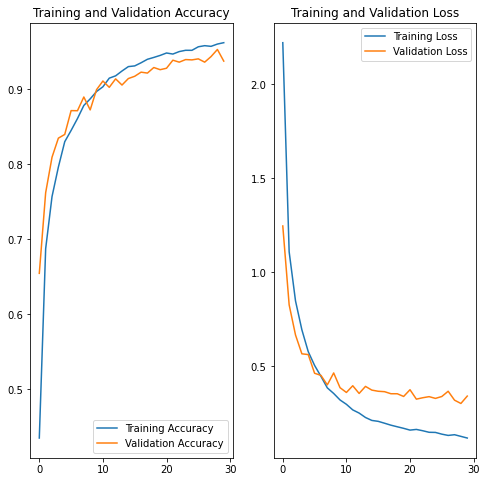

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from PIL import Image
img = Image.open('demo_image.jpg')
plt.imshow(img)
img = img.resize((40, 40))

In [29]:
pip install -q tensorflow-io

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
import tensorboard
tensorboard.__version__


TensorFlow version:  2.6.0


'2.6.0'

In [46]:
%tensorboard --logdir logs

!tensorboard dev upload \
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

'tensorboard' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
res = tf.math.confusion_matrix(labels,predictions)

NameError: name 'labels' is not defined

In [52]:
os.environ['TENSORBOARD_BINARY'] = '/path/to/envs/my_env/bin/tensorboard'
%tensorboard --logdir logs

ERROR: Could not find '/path/to/envs/my_env/bin/tensorboard' (set by
the `TENSORBOARD_BINARY` environment variable). Please ensure that
your PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_ds.class_names, predictions)

AttributeError: 'numpy.ndarray' object has no attribute 'class_names'

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'input_destination/validate', # Put your path here
     target_size=(32, 32),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = classifier.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
print(true_classes)
print(class_labels)
#score = tf.nn.softmax(predicted_classes[0])

#print("This image most likely belongs to {} with a {:.2f} percent confidence."
#            .format(class_names[np.argmax(score)], 100 * np.max(score))
 #       )
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_labels)

Found 122 images belonging to 122 classes.


G:\Anaconda\envs\tf-gpu\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '6

LabelEncoder()

In [16]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(class_labels, predictions)
cm = tf.math.confusion_matrix(true_classes,predicted_classes)
print(cm)

tf.Tensor(
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]], shape=(122, 122), dtype=int32)


In [30]:
import seaborn as sns
fig = plt.figure(figsize=(244,244))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = "d",vmin=0, vmax=1,linewidths=.5,square=True); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=200)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(predicted_classes, fontsize = 40)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=200)
ax.yaxis.set_ticklabels(true_classes, fontsize = 40)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=200)

plt.savefig('ConMat24.png')
plt.show()

In [34]:
precision=tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
print(precision)

In [89]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(true_classes)
for i in range(len(true_classes)):
    precision[i], recall[i], _ = precision_recall_curve(true_classes[i], predicted_classes[i])
    average_precision[i] = average_precision_score(true_classes[i], predicted_classes[i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    true_classes.ravel(), predicted_classes.ravel()
)
average_precision["micro"] = average_precision_score(true_classes,predicted_classes, average="micro")

TypeError: Singleton array 0 cannot be considered a valid collection.

In [42]:
r=tf.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)
print(r)

In [66]:
from sklearn.metrics import precision_score
precision = precision_score(true_classes,predicted_classes, average='weighted')
print('Precision: %.3f' % precision)

Precision: 0.738


In [67]:
from sklearn.metrics import recall_score
recall = recall_score(true_classes,predicted_classes, average='weighted')
print('Recall: %.3f' % recall)

Recall: 0.820


In [68]:
from sklearn.metrics import precision_score, recall_score

precision_score(true_classes,predicted_classes, average='weighted')

0.7377049180327869

In [69]:
recall_score(true_classes,predicted_classes, average='weighted')

0.819672131147541

In [70]:
from sklearn.metrics import f1_score

f1_score(true_classes,predicted_classes, average='weighted')

0.7636612021857923

In [81]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y = label_binarize(y, classes=true_classes)

NameError: name 'y' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [65]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(true_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data_generator[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

NameError: name 'accuracy_score' is not defined

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

TypeError: only integer scalar arrays can be converted to a scalar index

AttributeError: 'DirectoryIterator' object has no attribute 'astype'

KeyError: 'macro'

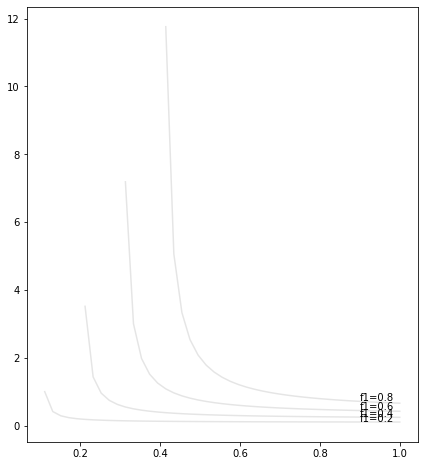

In [100]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(true_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

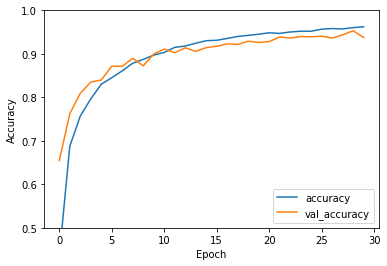

In [101]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')




In [103]:
tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, num_labels=None, label_weights=None,
    from_logits=False
)


KeyError: 'precision'

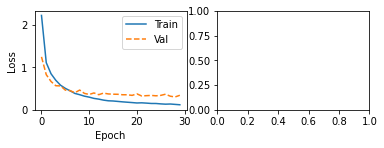

In [107]:
def plot_metrics(history):
  metrics = ['loss','precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();
plot_metrics(history)


In [112]:
import sklearn
from sklearn.metrics import roc_curve, auc
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
#plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline",true_classes,predicted_classes, linestyle='--')
plt.legend(loc='lower right');


ValueError: multiclass format is not supported